tensor([[1.],
        [2.],
        [3.]])
tensor([[2.],
        [4.],
        [6.]])
epoch :0, loss :7.797401428222656
epoch :100, loss :0.11788082122802734
epoch :200, loss :0.07284323126077652
epoch :300, loss :0.045012716203927994
epoch :400, loss :0.027815081179142
epoch :500, loss :0.017188025638461113
epoch :600, loss :0.010621157474815845
epoch :700, loss :0.006563269998878241
epoch :800, loss :0.004055693279951811
epoch :900, loss :0.002506176708266139
epoch :1000, loss :0.0015486575430259109
w =  1.9544037580490112
b =  0.10365105420351028
y_pred =  7.921266078948975


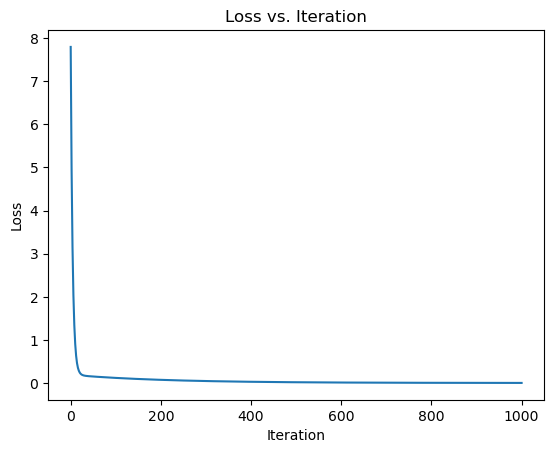

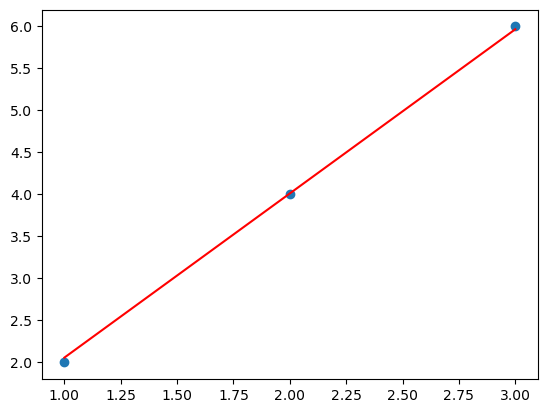

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim


# Step 1: Define the Linear Model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()  # Inheritance in Classes
        # Define a single linear layer
        self.linear = nn.Linear(input_dim, output_dim)

        # Setting bias=False removes the bias term completely
        # self.linear = nn.Linear(input_dim, output_dim, bias=False)

    def forward(self, x):
        # Forward pass: simply return the linear layer's output, like __call__(), overwrite
        # out = self.linear(x)
        return self.linear(x)


# Step 2: Initialize the model, loss function and optimizer
input_dim = 1  # e.g., number of features
output_dim = 1  # e.g., number of outputs (for regression, typically 1)
model = LinearRegressionModel(input_dim, output_dim)
# Mean Squared Error (MSE) Loss for regression tasks
criterion = nn.MSELoss()
# Stochastic Gradient Descent (SGD) optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 3: Prepare the data (example data)
# Input (features) and output (target) data
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
# x_data = torch.tensor([[795.0], [800.0], [805.0], [810], [815], [820]])
# y_data = torch.tensor([[7.6], [8.0], [8.4], [9.1], [9.5], [10.2]])
print(x_data)
print(y_data)

epochs = 1001
loss_list = []
for epoch in range(epochs):

    # Forward pass: compute the predicted output
    y_pred = model(x_data)
    """
    [[2.0],   [[1.0],
     [4.0], =  [2.0], * w + b
     [6.0]]    [3.0]]
    """

    # Compute the loss
    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    # Backward pass : compute the gradients
    optimizer.zero_grad()  # Clear the previous gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    if epoch % 100 == 0:
        print(f"epoch :{epoch}, loss :{loss.item()}")

print("w = ", model.linear.weight.item())
print("b = ", model.linear.bias.item())

# Test Model
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print("y_pred = ", y_test.data.item())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(epochs), loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. Iteration")
plt.show()

# Plot the original data and the model's predictions
plt.scatter(x_data.numpy(), y_data.numpy(), label="Original data")
plt.plot(
    x_data.numpy(), model(x_data).detach().numpy(), label="Fitted line", color="red"
)

In [14]:
class Foobar:
    def __init__(self):
        pass

    def __call__(self, *args, **kwargs):
        print("hello" + str(args[0]))


def func(a, b, c, x, y):
    pass


func(1, 2, 3, x=4, y=5)
foobar = Foobar()
foobar(1, 2, 3)

hello1
